In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).\
    first()
recent_date

('2017-08-23',)

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
(2017, 8, 23)
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


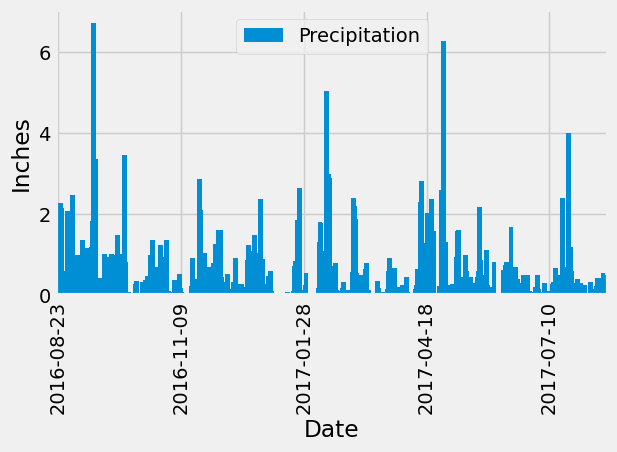

In [34]:
# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df1 = pd.DataFrame(query1, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df1.sort_values("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df1.plot.bar(width= 20)
xticks1 = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
xticks1_location = [0,500,1000,1500,2000]
plt.xticks(xticks1_location, xticks1)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc= "upper center")
plt.tight_layout()
plt.show()

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
df2 = pd.DataFrame(df1["Precipitation"].describe())
df2

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).distinct().count()

9

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query2 = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()
query2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

The most active station is USC00519281

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query3 = session.query(func.min(Measurement.tobs),
                       func.max(Measurement.tobs),
                       func.avg(Measurement.tobs)).\
                        filter(Measurement.station == 'USC00519281').\
                        all()
query3

[(54.0, 85.0, 71.66378066378067)]

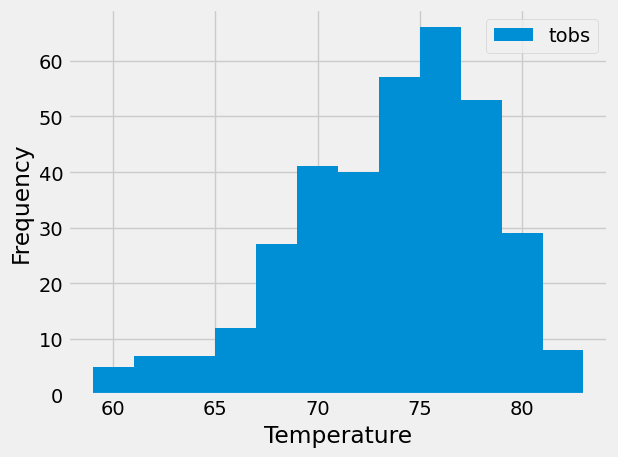

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query4 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').\
    all()
df3 = pd.DataFrame(query4, columns=["tobs"])
df3.plot.hist(bins=12, xlabel= "Temperature")
plt.tight_layout()
plt.show()

# Close Session

In [40]:
# Close Session
session.close()